In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("titanic1.csv")
df

,passenger id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()


,passenger id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

passenger id      0
survived          0
pclass            0
name              0
sex               0
age             177
sibsp             0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

In [7]:
df.describe()

,passenger id,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'bar graph of people according to ticket class in which people survived')

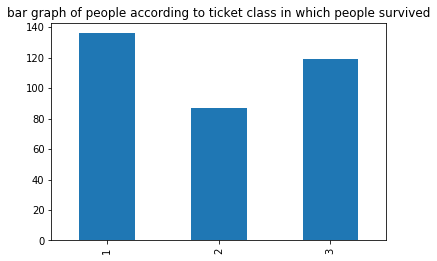

In [8]:
#survived based on passenger class
plt.figure(1)
df.loc[df["survived"]==0,"pclass"].value_counts().sort_index().plot.bar()
plt.title("bar graph of people according to ticket class in which people couldnot survived")

Text(0.5, 1.0, 'bar graph of people according to ticket class in which people survived')

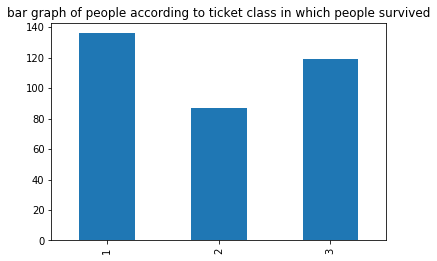

In [9]:
plt.figure(1)
df.loc[df["survived"]==1,"pclass"].value_counts().sort_index().plot.bar()
plt.title("bar graph of people according to ticket class in which people survived")

([<matplotlib.axis.XTick at 0x24fc6d20648>,
 <a list of 10 Text xticklabel objects>)

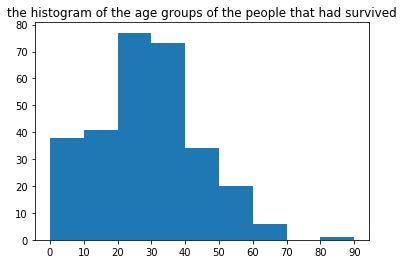

In [10]:
#survival based on age
plt.figure(1)
age=df.loc[df.survived==1,"age"]
plt.title("the histogram of the age groups of the people that had survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

([<matplotlib.axis.XTick at 0x24fc6da6fc8>,
 <a list of 10 Text xticklabel objects>)

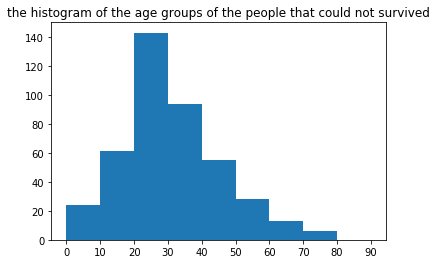

In [11]:
plt.figure(2)
age=df.loc[df.survived==0,"age"]
plt.title("the histogram of the age groups of the people that could not survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


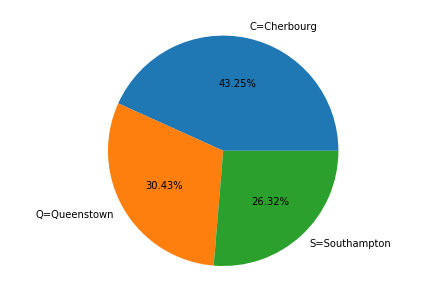

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
l=["C=Cherbourg","Q=Queenstown","S=Southampton"]
s=[0.55371,0.389610,0.336957]
ax.pie(s,labels=l,autopct="%1.2f%%")
plt.show()

In [13]:
df[["pclass","survived"]].groupby(["pclass"],as_index=False).mean().sort_values(by="survived",ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
df[["sibsp","survived"]].groupby(["sibsp"],as_index=False).mean().sort_values(by="survived",ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
df[["embarked","survived"]].groupby(["embarked"],as_index=False).mean().sort_values(by="survived",ascending=False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [16]:
#titanic survival prediction
#droping useless columns
df=df.drop(["ticket"],axis=1)

In [18]:
df=df.drop(["cabin"],axis=1)

In [19]:
df

,passenger id,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [44]:
#Here We Select Some Important Labels/Features For Our Model Training.
#feature selection
column_train=["sex","age","pclass","sibsp","parch","fare","sex","embarked","sex"]
#training values
x=df[column_train]
x=df['sex']
#target value
y=df["survived"]


In [22]:
#handling missing value
#now we have to fill all the missing values
#age have 177 missing values
#either we fill missing values with mean or median
x["age"]=x["age"].fillna(x["age"].median())
x["age"].isnull().sum()


0

In [51]:
#training testing and splitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [53]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


ValueError: could not convert string to float: 'female'